# K means Clustering

In [2]:
# demo 9.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Preparing randomly generated dataset using the make_blobs class of sklearn.datasets library

In [3]:
X,y=make_blobs(n_samples=2500, centers=[[4,5], [0, -1], [2, -3], [1, 2], [5,2]], cluster_std=0.8,random_state=0)

In [4]:
X

array([[ 1.47867503, -2.59614763],
       [ 0.02220971, -1.34043377],
       [ 1.97837181,  1.73495309],
       ...,
       [ 4.12381956,  2.18849669],
       [ 4.78299199,  1.45314596],
       [ 3.66910482,  4.40203615]])

In [5]:
y

array([2, 1, 3, ..., 4, 4, 0])

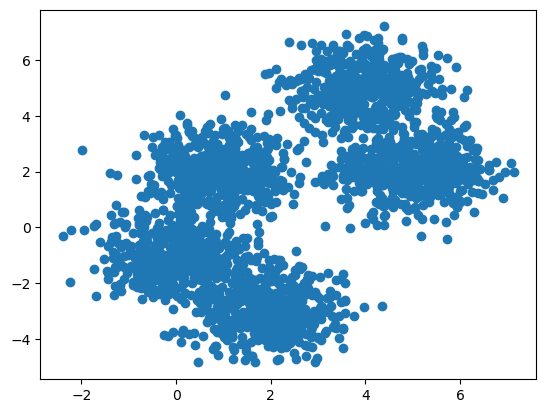

In [6]:
plt.scatter(X[:,0],X[:,1])
plt.show()

# build the model

In [8]:
KMeans_model=KMeans(n_clusters=2)
KMeans_model.fit(X)

KMeans(n_clusters=2)

In [9]:
# these 2 lines create a Kmean model object,specified the desired number of clusters(2) and then train thee model on the provided data(X) to perform the clustering task.

# extract featues of the model

In [11]:
Kmean_centroid=KMeans_model.cluster_centers_
Kmean_centroid

array([[ 3.79863438,  3.30224285],
       [ 0.91718478, -1.36176725]])

In [12]:
labels = KMeans_model.labels_
print(labels)

[1 1 0 ... 0 0 0]


In [22]:
# training the model:Kmeans.fit(x)
# finding the centres points : once the cluster is done ,each cluster will have  a centre point 
# cluster_centroid=Kmean_model.cluster_centres_instructs the code to store the location of these cluster centres named cluster_centroid
# cluster_centroid:will likely to be 2d numpy array(assumoing  your data  has 2 features)
# each row in the array representsthe centre point of a cluster.

# create labels

In [25]:
label=KMeans_model.labels_
label

array([1, 1, 0, ..., 0, 0, 0])

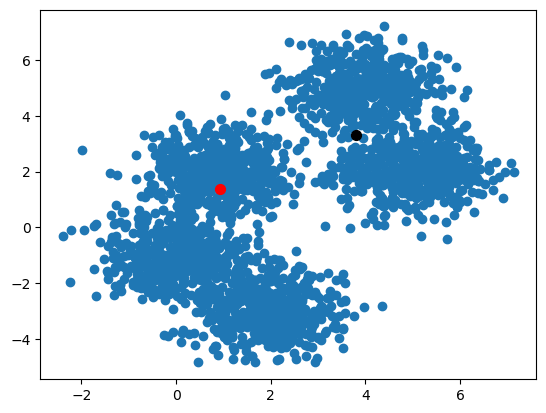

In [27]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(0.91718478,1.36176725,c='r',s=50)
plt.scatter(3.79863438,3.30224285,c='0',s=50)
plt.show()

In [29]:
cluster_1=KMeans_model.cluster_centers_[0]
cluster_1

array([3.79863438, 3.30224285])

In [31]:
cluster_2=KMeans_model.cluster_centers_[1]
cluster_2

array([ 0.91718478, -1.36176725])

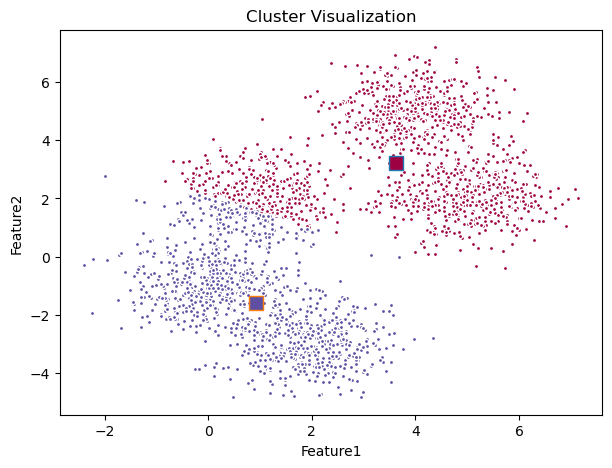

In [21]:
# color for plotting: 
# plt.cm.Spectral: Import a color map named spectral from the matplotlib.pyplot library.
# len(set(labels)) : It calcualtes the number of unique values in the label array.
# np.linspace(): This creates a list of position within the spectral color map there will be one position for each unique cluster label.
colors=plt.cm.Spectral(np.linspace(0,1,len(set(labels)))) 
fig=plt.figure(figsize=(7,5))
# create a plot:
# ax: This line creates a subplot object named ax and add it to the figure fig.
# (1,1,1): Specifies the layout of the subplots it create a single subplots that occupies the entire figure area.
ax=fig.add_subplot(1,1,1) 
# for loop: It iterates through the clusters and cooresponding colors.this k variable will represent the index of the current clusters in each iteration.

for k,col in zip(range(len(KMeans_model.cluster_centers_)),colors):
# mymembers: tHIS Line creates a boolean array named mymembers.it uses element wise comparison(==)to check the each element in the label array(containing cluster label for the data points) matches the current cluster  index.  #   
    my_members=(labels==k)
#if len: Handle single cluster case (if cluster_centroid) is a 1d array This condition checks the if the shape of  KMeans_model.cluster_centers_ is a single dimension array if true,it extracts the x and y coordinates the single y centroid
    if len(KMeans_model.cluster_centers_.shape)==1:
        centroid_x=KMeans_model.cluster_centers_[0]
        centroid_y=KMeans_model.cluster_centers_[1]

    else:
        cluster_centroid=KMeans_model.cluster_centers_[k]
        centroid_x=cluster_centroid[0]  # X coordinate
        centroid_y=cluster_centroid[1]   # Y coordiante
    ax.plot(X[my_members,0],X[my_members,1],"w",markerfacecolor=col,marker=".")
    ax.plot(centroid_x,centroid_y,marker="s",markerfacecolor=col,markersize=10)
ax.set_title("Cluster Visualization")
ax.set_xlabel("Feature1")
ax.set_ylabel("Feature2")
plt.show()

In [37]:
len(KMeans_model.cluster_centers_.shape)

2

In [22]:
centroid_x = cluster_centroid[0]
centroid_y = cluster_centroid[1]
print(centroid_x)
print(centroid_y)

0.9241808650355576
-1.5849472960153617


In [23]:
colors=plt.cm.Spectral(np.linspace(0,1,len(set(labels)))) 
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

# using test data to predict the clusters using the model

In [25]:
X #initial data in 2d array

array([[ 1.47867503, -2.59614763],
       [ 0.02220971, -1.34043377],
       [ 1.97837181,  1.73495309],
       ...,
       [ 4.12381956,  2.18849669],
       [ 4.78299199,  1.45314596],
       [ 3.66910482,  4.40203615]])

# unknown data for testing

In [27]:
sample_test=np.array([3.0,1.5])
sample_test

array([3. , 1.5])

In [28]:
second_test=sample_test.reshape(1,-1)
second_test

array([[3. , 1.5]])

In [29]:
predict=KMeans_model.predict(second_test)
predict

array([0])

In [30]:
# it belongs to 0 cluster

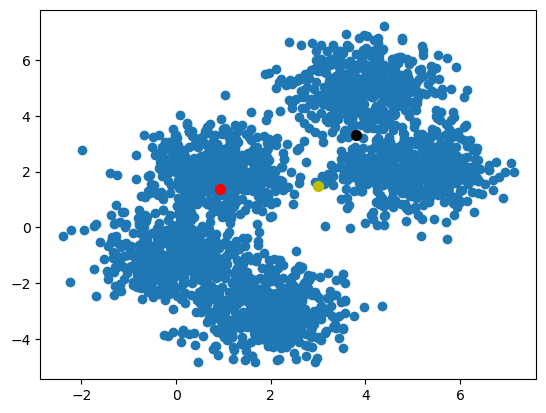

In [31]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(0.91718478,1.36176725,c='r',s=50)
plt.scatter(3.79863438,3.30224285,c='0',s=50)
plt.scatter(3. , 1.5,c='y',s=50)
plt.show()

# 9.2
# rebuilt the model with the optimum K value.

In [33]:
# finding the optium value of k  using elbow method

In [34]:
KMeans_model.inertia_ 
#inertia:this wss(within sum of square),this is a error value at k=2
#now we want to check various values ok k that is k=1,2,3,....
                        

11975.989971103609

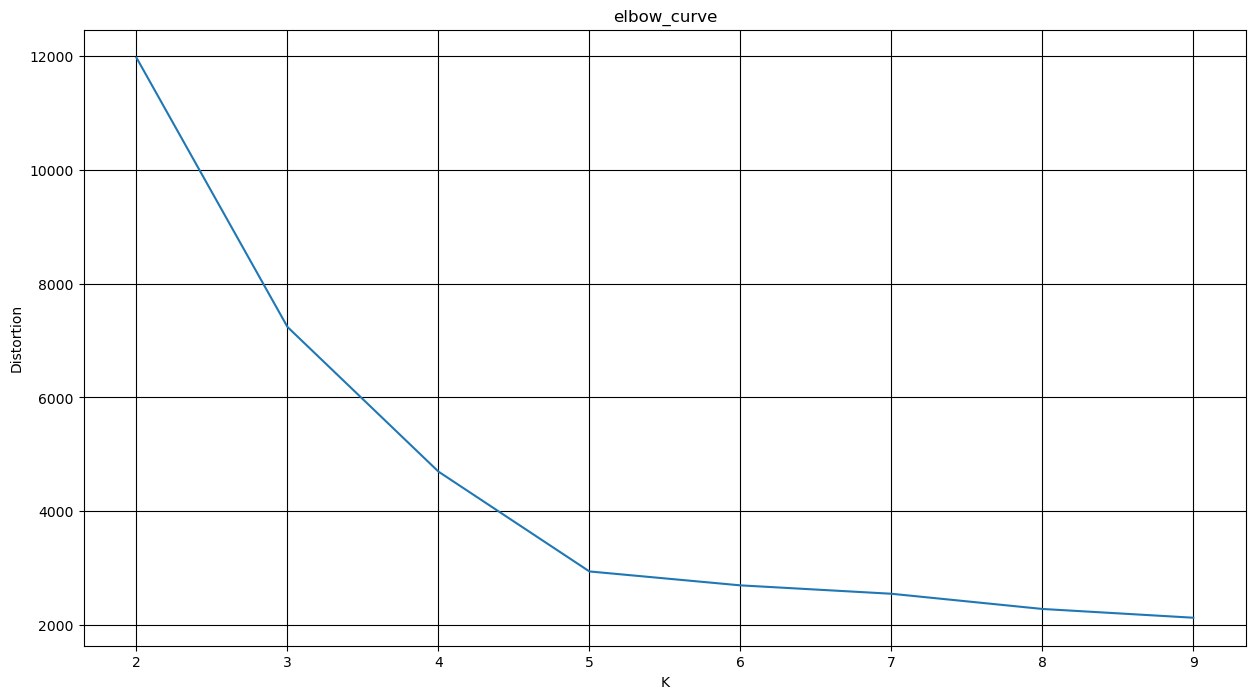

In [35]:
Distortion=[]
for k in range(2,10):
    KMeans_model=KMeans(n_clusters=k)
    KMeans_model.fit(X)
    Distortion.append(KMeans_model.inertia_)

figure=plt.figure(figsize=(15,8))
plt.plot(range(2,10),Distortion)
plt.grid(True,c='black')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('elbow_curve')
plt.show()


In [36]:
# intra: it is a distance b/w within a cluster
# inter:it is a differnece b/w clusters

In [37]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# find the optimum value of k and cluster efficency using silhouette score

range_n_clusters: this line defines the list of potential numnber of clusters(n_clusters) that will be tested.

for loop:this iniates the loop that iterates through each values in that range(range_n_clusters) list.
In each iterations,the current number of clusters being tested is assigned to the variable(n_clusters).

set_xlim:ax1 taking the range from [-0.1,1] because silhouette_score ranges -1 to 1 ,so we are setting the xaxis slightly beyound the range -0.1 provides a little visualls buffer.

set_ylim:this sets the yaxis limits of the subplots.len(x)-represents the no.of datapoints in the dastaset X.the rest of the expression(n_clusters+1)*10]) add some extra vertical space to the plot.this is just done to make the room for visualizing the clusters and silhouette_score for each cluster without the plot being crambed.the y-axis essentilaly represents the index of each datapoints.

optimum cluster selection:(result)
the goal is to find the no.of clusters that maximizes the silhouette_score. In this case the highest avg_silhouette_score is 0.5356021066764666 whih corresponds to 5 clusters therfore based on the analysis 5 would be choosen as the optimal no.of clusters for this dataset using K-mean.
the silhouette_score is just a one metric for evaluating the clustring performnace other metrics and domain knowledge sholud also be considered when choosing the final no.of clusters.

y_lower=10: this initializes the variable     this variable used to manage the vertical poistioing of the silhouette plots for each clustrs in the visualization. it is essentially sets a small inital gap from the bottom of the plot.

 for i in range(n_clusters): this loops iterates through each clusters,where i reprents the cluster index(0,1,2,...) and n_clusters-1.

ith_cluster_silhouette_values=sample_silhouette_values[cluster_labels==i]:
this line selects the silhouette_score only for the datapoints that belongs to current cluster i.
[cluster_labels==i]:- creates a boolean mask(True or Fasle) indicating which datapoints are in cluster i. this mask is used to index sample_silhouette_values,extracting the relevant silhouette_score


cm.nipy_Spectral:it is a color map from a matplotlib.
float(i)/n_clusters:normalizes the cluster index i to a value b/w 0 and 1,which is then used to select a color from colormap this ensuresthat each clusters get a distinct colors
:


ax1.fill_betweenx:it does the fill the area b/w two vertical values(y_lower and y_upper) with the specified color
np.arange(y_lower,y_upper):
creates an array of y_coordinates  corresponding to each datapoints in the cluster
0:this is the startuing x-coordinates (left edge of the plot)
ith_cluster_silhouette_values:provides the x-coordinates for the right edge of the plot,determing the width of each bar bsed on silhouette_score
 ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i)): this adds a text label to a silhouette_plot to a currebt cluster,displaying the curent cluster i
 -0.05:sets the x-coordinates for the text label slightly to the left of the plot
 y_lower+0.5*size_cluster_i:calculate the vertical position for the text label(at the middle of ghe cluster plots)


y_lower=y_upper+10: after plotting the cluster, this lines updates y_lower to prepare plotting for the nect cluster.it adds the samll vertivcal gaps(10 units) b/w the plot of consecutive clusters

for n_clusters= 2 average silhouette_score is: 0.514342469692536
for n_clusters= 3 average silhouette_score is: 0.48969444407195495
for n_clusters= 4 average silhouette_score is: 0.5233089613409538
for n_clusters= 5 average silhouette_score is: 0.5356021066764666
for n_clusters= 6 average silhouette_score is: 0.47488167609273096
for n_clusters= 7 average silhouette_score is: 0.43932330316309764
for n_clusters= 8 average silhouette_score is: 0.3863870100226676
for n_clusters= 9 average silhouette_score is: 0.35921415517962973
for n_clusters= 10 average silhouette_score is: 0.3365506234855683


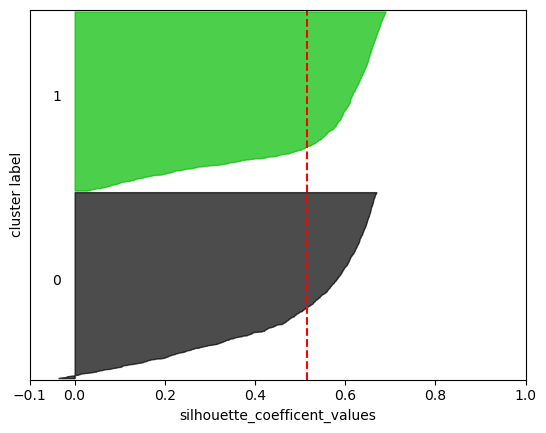

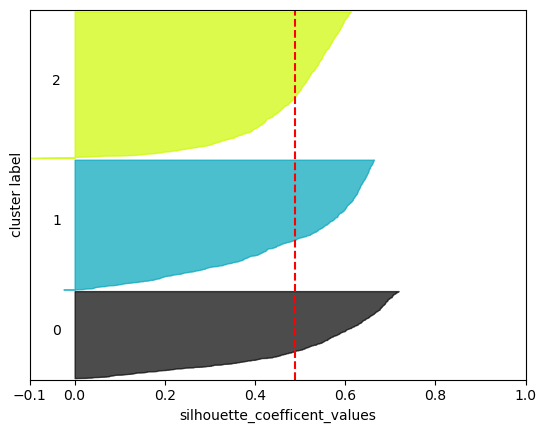

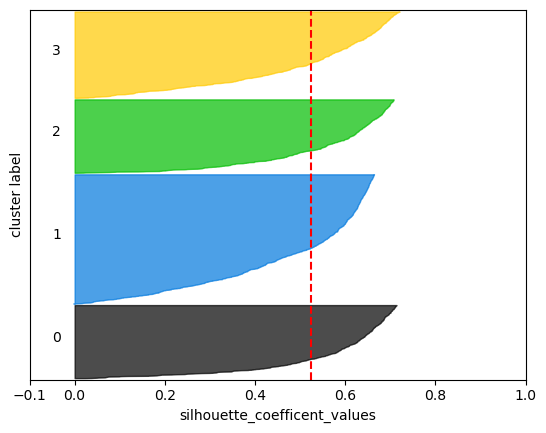

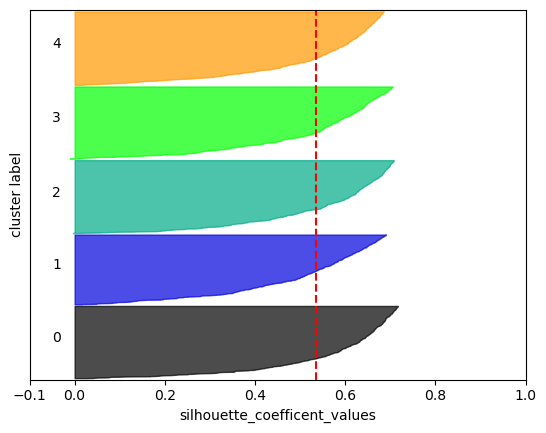

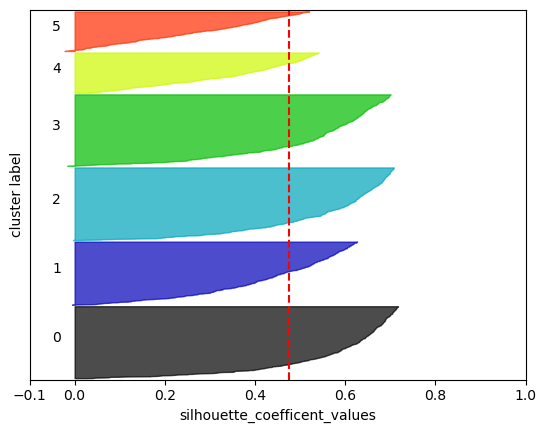

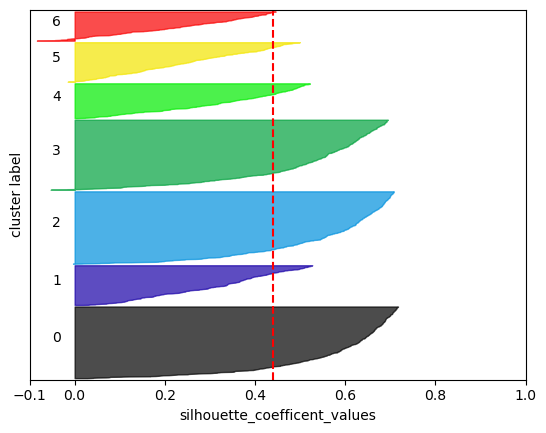

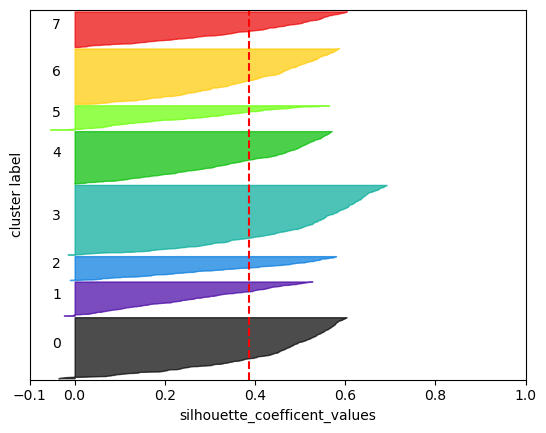

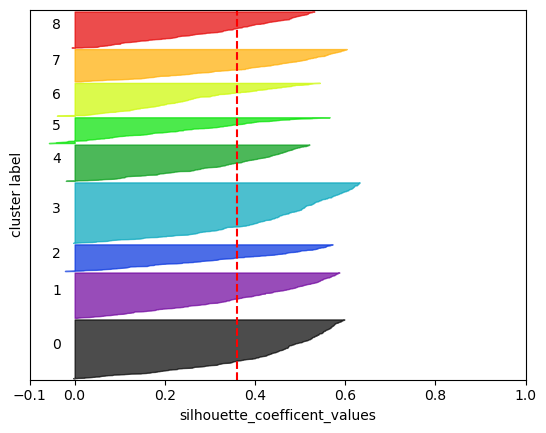

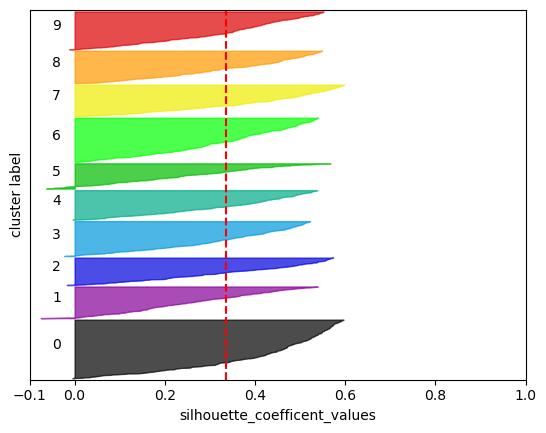

In [40]:
range_n_clusters=[2,3,4,5,6,7,8,9,10] 
for n_clusters in range_n_clusters:
    figure,ax1=plt.subplots(1,1) # create a subplot with one row two columns
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0,len(X)+(n_clusters+1)*10])
    cluster=KMeans(n_clusters=n_clusters,random_state=10)
    cluster_labels=cluster.fit_predict(X)
    silhouette_avg=silhouette_score(X,cluster_labels)
    print("for n_clusters=",n_clusters,"average silhouette_score is:",silhouette_avg)
    # compute the silhouette_score for each sample
    sample_silhouette_values=silhouette_samples(X,cluster_labels)
    y_lower=10
    for i in range(n_clusters):
        ith_cluster_silhouette_values=sample_silhouette_values[cluster_labels==i]
        ith_cluster_silhouette_values=np.sort(ith_cluster_silhouette_values) #sorting the score for current cluster in ascending order this is done to arrange 
         # bars in the silhouette plots from left to right based on  the silhouette_score
        size_cluster_i=ith_cluster_silhouette_values.shape[0] # this lines calculate the datapoint in the cluster i
        y_upper=y_lower+size_cluster_i  #this calculates the upperlimit for the vertical region whrere the silhouette plots for the curent cluster i will be drawn.
        # it acts the number of datapoints in the cluster to the current lower_limit.
        color=cm.nipy_spectral(float(i)/n_clusters) 
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
        # label the ilhouette plots with thier clusters number at the middle.
        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i))
        # compute the new y_lower for the next plot
        y_lower=y_upper+10
    ax1.set_xlabel("silhouette_coefficent_values") 
    ax1.set_ylabel("cluster label") 
    # vertical line for avg silhouette_score for all the values
    ax1.axvline(x=silhouette_avg,c='r',ls='--')
    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
plt.show()

In [41]:
# alternative way

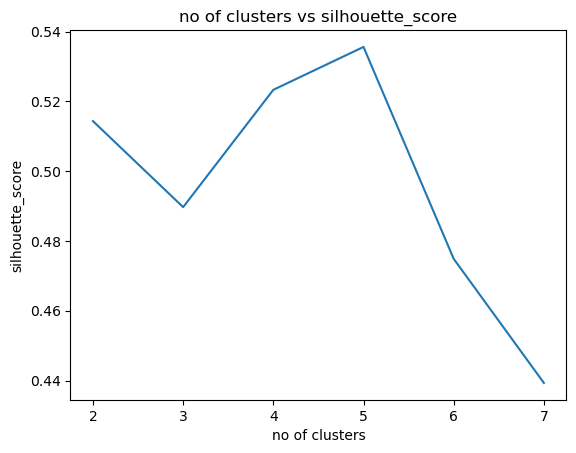

In [42]:
n_clusters_range=range(2,8)
silhouette_score_s=[]
for n_clusters in n_clusters_range:
    #train model and get silhouette_score
    silhouette_score_s.append(silhouette_score(X,KMeans(n_clusters=n_clusters,random_state=10).fit_predict(X)))

plt.plot(n_clusters_range, silhouette_score_s)
plt.xlabel("no of clusters")
plt.ylabel("silhouette_score")
plt.title("no of clusters vs silhouette_score")
plt.show()

In [44]:
# highest silhouette_score is observed when the number of cluster is 5 this suggest that 5 cluster might be good choice for the data.
# so based in the silhouette_score_plot the optimal clusters for the datset is 5

In [46]:
# rebuild the model using k=5

k_model_5=KMeans(n_clusters=5)
k_model_5.fit(X)


KMeans(n_clusters=5)

In [48]:
# extracting the features of the model
clusters_centroid_5=k_model_5.cluster_centers_
clusters_centroid_5

array([[ 0.91610123,  2.00274501],
       [ 5.01958163,  2.00255899],
       [ 1.94068385, -3.00157536],
       [ 3.93063379,  4.99414758],
       [-0.02920947, -1.00974125]])

In [50]:
labels_5=k_model_5.labels_
labels_5

array([2, 4, 0, ..., 1, 1, 3])

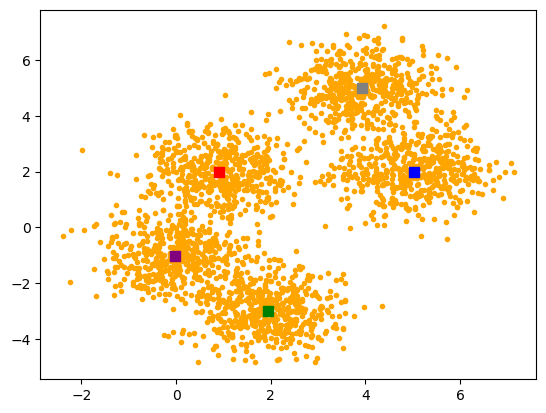

In [52]:
# visaulize
centroid_colors=['red','blue','green','gray','purple']
c=0

plt.scatter(X[:,0],X[:,1],marker='.',c='orange')
for i,j in clusters_centroid_5:
    plt.scatter(i,j,s=50,c=centroid_colors[c],marker='s')
    c=c+1
plt.show()



In [56]:
from sklearn.metrics import calinski_harabasz_score


# calinski_harabasz_score purpose

In [ ]:
# - calinski_harabasz_score : measures the ratio of between clusters and dispersion to within cluster dispersion. 
# A higher chi indicates better defined clusters
# the range of the calinski_harabasz_index is 0 to infinity.

In [58]:
ch_index=calinski_harabasz_score(X,labels_5)
ch_index

5901.3809789753495

# purpose of davies_bouldin_index

In [ ]:
# mesasures the avg similarity b/w each clusters and its most similar cluster.
# lower value indicates better clustering,with zero being best possible score
# thr range is zero to infinity and zero represents perfect clustering

In [60]:
from sklearn.metrics import davies_bouldin_score

In [62]:
db_score=davies_bouldin_score(X,labels_5)
db_score

0.640593112130629

summary notes: